In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
weather = pd.read_csv(r'forest_data.csv', on_bad_lines = 'skip', index_col = 'Unnamed: 0')

In [4]:
weather[:10]

,area_type_cd,site_type_cd,moisture_cd,degradation_cd,soil_subtype_cd,plant_comm_cd,stand_struct_cd,sub_area,veg_cover_cd,forest_id,avg_lat,avg_lon,tree_species,area
0,D-STAN,BŚW,Ś,N2,RDw,NaN,DRZEW,9.20,MSZC,101025863,53.811817,23.275983,SO,9.20
1,D-STAN,OLJ,ŁZ,N2,Mt,NaN,KDO,8.44,ZAD,101027565,53.793429,23.136016,OL,8.44
2,D-STAN,BŚW,Ś,N2,RDb,NaN,DRZEW,8.12,ZAD,101028430,53.710679,23.036625,SO,8.12
3,D-STAN,LMB,BO,N2,Mt,NaN,DRZEW,5.35,ZIEL,101008890,53.773599,23.273369,?W,5.35
4,D-STAN,BŚW,Ś,N2,RDb,NaN,DRZEW,14.12,ZAD,101009062,53.776887,23.304634,SO,14.12
5,D-STAN,OLJ,ŁN,N2,Tn,NaN,DRZEW,5.88,ZAD,101011840,53.773644,23.129555,OL,5.88
6,D-STAN,BŚW,Ś,N2,RDw,NaN,DRZEW,8.61,MSZC,101026760,53.831068,23.195946,SO,8.61
7,D-STAN,BŚW,Ś,N2,RDw,NaN,DRZEW,5.82,MSZC,101002523,53.855957,23.190055,SO,5.82
8,D-STAN,OLJ,ŁN,N2,MRm,NaN,DRZEW,6.56,SZCH,101026731,53.867053,23.214690,OL,6.56
9,D-STAN,BŚW,Ś,N2,RDw,NaN,DRZEW,7.40,MSZC,101007604,53.802956,23.278495,SO,7.40


In [5]:
latitude = weather['avg_lat']
longitude = weather['avg_lon']

latitude.where(cond = latitude > 49, other = 49, inplace = True)
latitude.where(cond = latitude < 55, other = 55, inplace = True)

longitude.where(cond = longitude < 25, other = 25, inplace = True)
longitude.where(cond = longitude > 14, other = 14, inplace = True)

<AxesSubplot:xlabel='avg_lat', ylabel='avg_lon'>

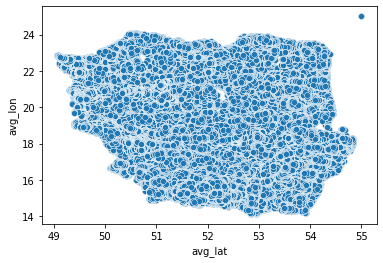

In [6]:
sns.scatterplot(data = weather, x = 'avg_lat', y = 'avg_lon')

In [7]:
sample = weather.iloc[np.random.randint(weather.shape[0])]
sample

area_type_cd       D-STAN    
site_type_cd          LMŚW   
moisture_cd               SŚ 
degradation_cd           N2  
soil_subtype_cd        BRb   
plant_comm_cd             NaN
stand_struct_cd       DRZEW  
sub_area                  6.2
veg_cover_cd             ZAD 
forest_id          1318002979
avg_lat             51.435391
avg_lon             17.219348
tree_species               MD
area                      6.2
Name: 295640, dtype: object

In [8]:
weather['lat_round'] = weather['avg_lat'].round(1)
weather['lon_round'] = weather['avg_lon'].round(1)

In [13]:
weather['test'] = list(zip(weather['lat_round'], weather['lon_round']))

In [17]:
len(weather['test'].unique())

4063

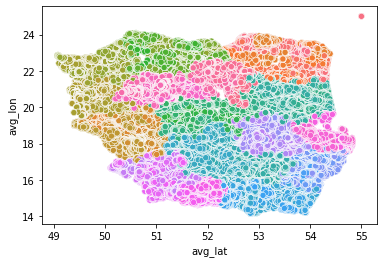

In [18]:
sns.scatterplot(data = weather, x = 'avg_lat', y = 'avg_lon', hue = 'test').legend_.remove()